<div dir="rtl">
    <h2>
       تمرین پنجم/بخش عملی
    </h2>
</div>
<p></p>
<div dir="rtl">
آرمین سعادت بروجنی
<p></p>
96105829
</div>

<div dir="rtl">
    <h2>
        تبدیل مجموعه داده به dataframe
    </h2>
</div>
<p></p>
<div dir="rtl">
برای سادگی مجموعه در قالب pandas.datafram استفاده می‌شود.
<p></p>    
    در ضمن مجموعه داده مقدار گم‌شده ندارد.
</div>

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 

raw_data = pd.read_csv("iris.csv")
raw_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


<div dir="rtl">
    همانطور که مشاهده می‌شود داده‌ها به ۳ دسته setosa و versicolor و virginica تقسیم می‌شود.   
</div>

In [2]:
raw_data['species'].value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

<div dir="rtl">
    <h2>
         بخش اول: perceptron
    </h2>
</div>

<div dir="rtl">
    برای این بخش داده‌های مربوط به گیاهان setosa و versicolor مورد بررسی قرار می‌گیرد که به ترتیب مقادیر ۱ و -۱ به عنوان کلاس آنها در نظر گرفته می‌شود. 
</div>

In [3]:
def setClass(type):
    if type == 'setosa':
        return 1
    else:
        return -1

perceptron_data = raw_data.query("species == 'setosa' or species == 'versicolor'")
t = perceptron_data['species'].map(setClass)
perceptron_data['t'] = t
perceptron_data


/home/rmool/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,sepal_length,sepal_width,petal_length,petal_width,species,t
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,versicolor,-1
96,5.7,2.9,4.2,1.3,versicolor,-1
97,6.2,2.9,4.3,1.3,versicolor,-1
98,5.1,2.5,3.0,1.1,versicolor,-1


<div dir="rtl">
    <h2>
           تقسیم مجموعه به train و  test
    </h2>
</div>
<p></p>
<div dir="rtl">
برای این کار ابتدا کل مجموعه به صورت رندوم بر خورد که هیچ ترتیب خاصی در قرارگیری داده‌ها نباشد.
<p></p>
    همچنین یک ستون بایاس به فیچرها اضافه شد.
</div>

In [4]:
perceptron_data = perceptron_data.sample(frac=1).reset_index(drop=True)
perceptron_data['bayas'] = 1


train = perceptron_data.head(80)
test = perceptron_data.tail(20)


x_train = train.drop(["species", "t"], axis=1).to_numpy()
t_train = train["t"].to_numpy()


x_test = test.drop(["species", "t"], axis=1).to_numpy()
t_test = test["t"].to_numpy()

<div dir="rtl">
    تابع ارور برای perceptron به شکل زیر است:
</div>
<p></p>
<img src="./images/perceptron_error_function.png">
<p></p>
<div dir="rtl">
        بنابراین روش SGD به شکل زیر خواهد بود:
<p></p>
<img src="./images/perceptron_update.png">
<p></p>
</div>

In [5]:
def get_misclassified(W):
    misclassified = []
    for i, x in enumerate(x_train):
        if W.dot(x) * t_train[i] <= 0:
            misclassified.append((x,t_train[i]))
    return misclassified

def update_W(rate, x, t, W):
    return W + rate * x * t

def perceptron(rate):
    W = np.zeros(x_test.shape[1])
    mis_per_it = []
    step = 0
    
    
    misclassified = get_misclassified(W)
    mis_per_it.append(len(misclassified))
    
    while len(misclassified) > 0:
        index = random.randint(0, len(misclassified) - 1)
        x, t = misclassified[index]
        W = update_W(rate, x, t, W)
        
        step += 1
        if step == 1000:
            break
            
        misclassified = get_misclassified(W)
        mis_per_it.append(len(misclassified))
    return W, mis_per_it
            
W_perceptron, misclassified_per_iteration = perceptron(0.001)

print("W* is: ", end="")
print(W_perceptron)

W* is: [ 0.0017  0.0043 -0.0069 -0.0031  0.001 ]


<div dir="rtl">
    در بخش بالا الگوریتم SGD پیاده‌سازی شد.
    <p></p>
        برای این پیاده‌سازی batch_size برابر با ۱ در نظر گرفت شد. 
        نرخ تغییر نیز برابر با  0.001 قرار داده شد.
    <p></p>
        در شکل زیر تعداد نقاط misclassified بر حسب iteration آمده است.
</div>

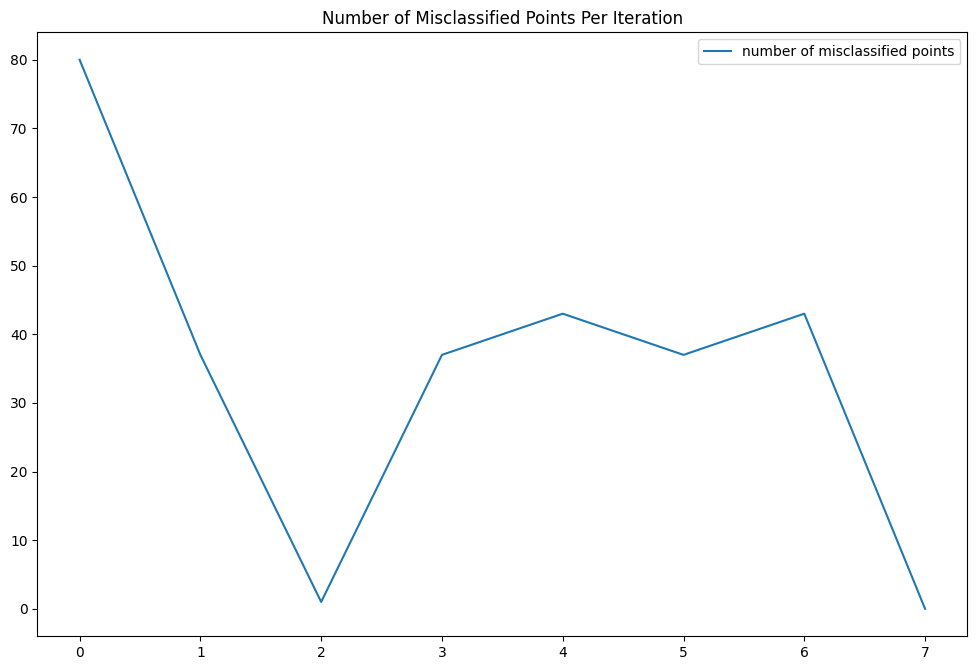

Number of Misclassified Points Per Iteration: [80, 37, 1, 37, 43, 37, 43, 0]


In [6]:
plt.plot(misclassified_per_iteration, label= 'number of misclassified points')
plt.title('Number of Misclassified Points Per Iteration')
plt.legend()
plt.show()

print("Number of Misclassified Points Per Iteration: ", end="")
print(misclassified_per_iteration)

<div dir="rtl">
    <p></p>
        اکنون با W به دست آمده داده‌های test را دسته‌بندی می‌کنیم.
</div>

In [7]:
def test_perceptron(W):
    error = 0
    misclassified = []
    for i, x in enumerate(x_test):
        if W.dot(x) * t_test[i] <= 0:
            misclassified.append((x,t_test[i]))
            error += W.dot(x) * t_test[i]
    return misclassified, error

misclassified, error = test_perceptron(W_perceptron)

print("Error: " + str(error))
print("Number of Misclassified Points: " + str(len(misclassified)) + "/20")

Error: 0
Number of Misclassified Points: 0/20


<div dir="rtl">
    <p></p>
        در ادامه confusion matrix آمده است.
</div>

In [8]:
actual_C1_predicted_C1 = 0
actual_C1_predicted_C2 = 0
actual_C2_predicted_C1 = 0
actual_C2_predicted_C2 = 0

for i, x in enumerate(x_test): 
    if t_test[i] == 1:
        if W_perceptron.dot(x) > 0:
            actual_C1_predicted_C1 += 1
        elif W_perceptron.dot(x) < 0:
            actual_C1_predicted_C2 += 1
    elif t_test[i] == -1:
        if W_perceptron.dot(x) > 0:
            actual_C2_predicted_C1 += 1
        elif W_perceptron.dot(x) < 0:
            actual_C2_predicted_C2 += 1
            
pd.DataFrame({'Predicted C1': [actual_C1_predicted_C1, actual_C2_predicted_C1], 'Predicted C2': [actual_C1_predicted_C2, actual_C2_predicted_C2]},index = ['Actual C1','Actual C2'])

,Predicted C1,Predicted C2
Actual C1,7,0
Actual C2,0,13


<div dir="rtl">
    <h2>
         بخش دوم: logistic regression
    </h2>
    <p></p>   
    <p></p>
    در ابتدا برای نشان دادن دسته هر داده از روش one_of_k_coding استفاده می‌شود.
</div>

In [9]:
def setC1(type):
    if type == 'setosa':
        return 1
    else:
        return 0
    
def setC2(type):
    if type == 'versicolor':
        return 1
    else:
        return 0

def setC3(type):
    if type == 'virginica':
        return 1
    else:
        return 0

data = raw_data.copy(deep=True)
C1 = data['species'].map(setC1)
C2 = data['species'].map(setC2)
C3 = data['species'].map(setC3)
data['C1'] = C1
data['C2'] = C2
data['C3'] = C3
data.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species,C1,C2,C3
130,7.4,2.8,6.1,1.9,virginica,0,0,1
98,5.1,2.5,3.0,1.1,versicolor,0,1,0
102,7.1,3.0,5.9,2.1,virginica,0,0,1
94,5.6,2.7,4.2,1.3,versicolor,0,1,0
76,6.8,2.8,4.8,1.4,versicolor,0,1,0
43,5.0,3.5,1.6,0.6,setosa,1,0,0
9,4.9,3.1,1.5,0.1,setosa,1,0,0
15,5.7,4.4,1.5,0.4,setosa,1,0,0
23,5.1,3.3,1.7,0.5,setosa,1,0,0
3,4.6,3.1,1.5,0.2,setosa,1,0,0


<div dir="rtl">
    تقسیم داده‌ها به test و train و اضافه کردن بایاس:
</div>

In [10]:
data = data.sample(frac=1).reset_index(drop=True)
data['bayas'] = 1


train = data.head(120)
test = data.tail(30)


x_train = train.drop(["species", "C1", "C2", "C3"], axis=1).to_numpy()
t_train = train[["C1", "C2", "C3"]].to_numpy()


x_test = test.drop(["species", "C1", "C2", "C3"], axis=1).to_numpy()
t_test = test[["C1", "C2", "C3"]].to_numpy()

<div dir="rtl">
    <h3>
        قسمت a)
    </h3>
</div>

<div dir="rtl">
    روابط مربوط به این بخش به شکل زیر است:
<p></p>
<img src="./images/yk.png">
<p></p>
<p></p>
<img src="./images/logistic_error_function.png">
<p></p>
<p></p>
<img src="./images/logistic_update.png">
<p></p>
</div>

In [11]:
def get_error(Ws):
    error = 0
    for i, x in enumerate(x_train):
        for k in range(1, 4):
            error -= t_train[i][k - 1] * np.log(softmax(k, x, Ws))
    return error

def softmax(k, x, Ws):
    Wk = Ws[k - 1]
    ak = Wk.dot(x)
    up = np.exp(ak)
    down = 0
    for W in Ws:
        aj = W.dot(x)
        down += np.exp(aj)
    return up / down
    

def update_W1(rate, W1, Ws):
    grad = 0
    for i, x in enumerate(x_train):
        grad += (softmax(1, x, Ws) - t_train[i][0]) * x
    return W1 - rate * grad

def update_W2(rate, W2, Ws):
    grad = 0
    for i, x in enumerate(x_train):
        grad += (softmax(2, x, Ws) - t_train[i][1]) * x
    return W2 - rate * grad

def update_W3(rate, W3, Ws):
    grad = 0
    for i, x in enumerate(x_train):
        grad += (softmax(3, x, Ws) - t_train[i][2]) * x
    return W3 - rate * grad


def logistic(rate, iterations):
    W1 = np.zeros(x_test.shape[1])
    W2 = np.zeros(x_test.shape[1])
    W3 = np.zeros(x_test.shape[1])

    loss = []
    
    for _ in range(iterations):
        W1_temp = update_W1(rate, W1, [W1, W2, W3])
        W2_temp = update_W2(rate, W2, [W1, W2, W3])
        W3_temp = update_W3(rate, W3, [W1, W2, W3])
        
        W1 = W1_temp
        W2 = W2_temp
        W3 = W3_temp
        
        loss.append(get_error([W1, W2, W3]))
            
    return W1, W2, W3, loss
            
W1, W2, W3, training_loss = logistic(0.007, 6000)


print("W1: ", end="")
print(W1)

print("W2: ", end="")
print(W2)

print("W3: ", end="")
print(W3)

W1: [ 3.60193426  6.66582257 -9.08632896 -4.47069455  1.53411324]
W2: [ 2.92871278  1.07579919 -3.00088317 -4.45888517  5.29299925]
W3: [-6.53064704 -7.74162176 12.08721213  8.92957972 -6.82711249]


<div dir="rtl">
    در بالا مدل logistic regression توسط روش Gradiant Descent پیاده‌سازی شد.
    <p></p>
    تعداد iteration و rate برای به روزرسانی پارامترها در واقع hyper_parameter هستند که چون validation_set نداریم دستی چک شد.
    <p></p>
    نمودار میزان خطا در هر iteration به شکل زیر است:
</div>

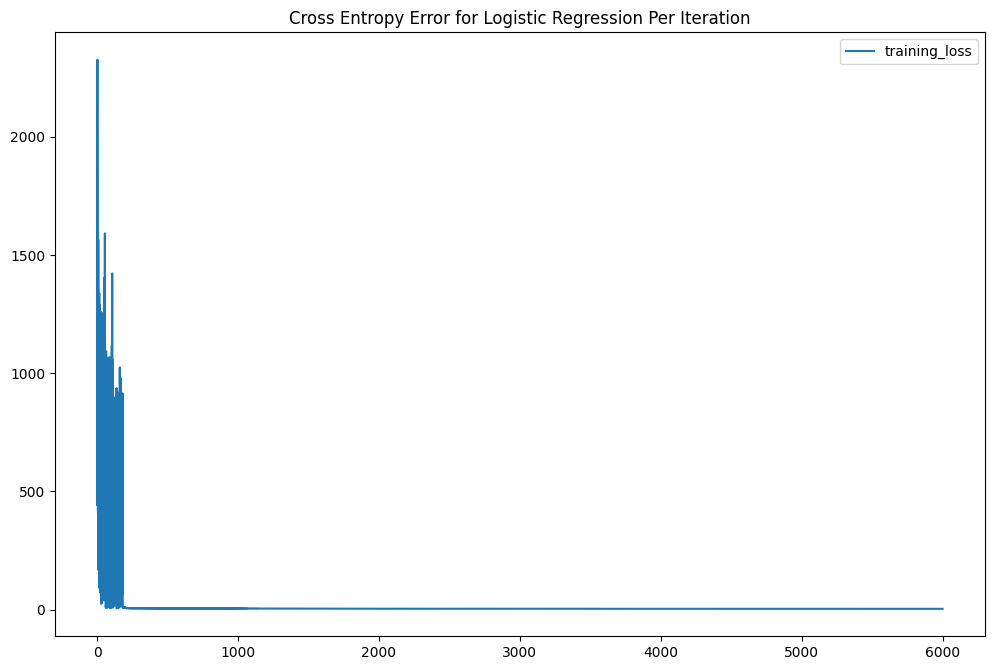

Final Loss on Training Data: 3.3901747555161026


In [12]:
plt.plot(training_loss, label='training_loss')
plt.title("Cross Entropy Error for Logistic Regression Per Iteration")
plt.legend()
plt.show()
print("Final Loss on Training Data: " + str(training_loss[-1]))

<div dir="rtl">
    نمودار برای ۲۵۰ iteration اول به شکل زیر است:
</div>

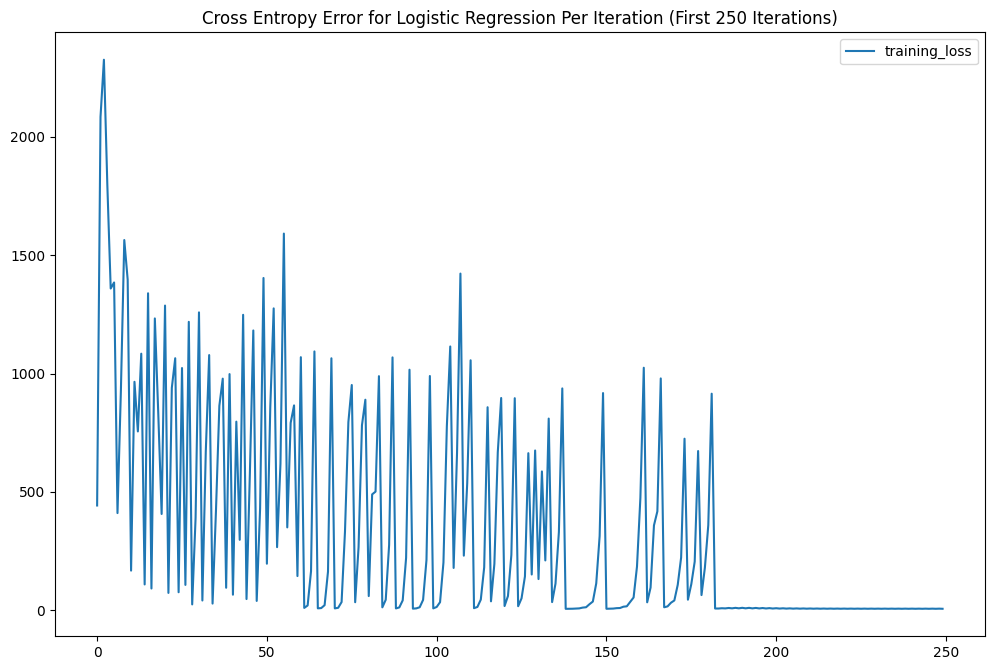

Loss at Iteration 250 on Training Data: 5.855095107723344


In [13]:
plt.plot(training_loss[0:250], label='training_loss')
plt.title("Cross Entropy Error for Logistic Regression Per Iteration (First 250 Iterations)")
plt.legend()
plt.show()
print("Loss at Iteration 250 on Training Data: " + str(training_loss[249]))

<div dir="rtl">
    <p></p>
        اکنون با W به دست آمده داده‌های test را دسته‌بندی می‌کنیم.
</div>

In [14]:
test_error = 0
for i, x in enumerate(x_test):
    for k in range(1, 4):
        test_error -= t_test[i][k - 1] * np.log(softmax(k, x, [W1, W2, W3]))
print("Logistic Regression Loss on Test Data: " + str(test_error))

Logistic Regression Loss on Test Data: 6.007787151467354


<div dir="rtl">
    <p></p>
        در ادامه confusion matrix آمده است.
</div>

In [15]:
def make_confusion_matrix(W1, W2, W3):
    actual_C1_predicted_C1 = 0
    actual_C1_predicted_C2 = 0
    actual_C1_predicted_C3 = 0

    actual_C2_predicted_C1 = 0
    actual_C2_predicted_C2 = 0
    actual_C2_predicted_C3 = 0

    actual_C3_predicted_C1 = 0
    actual_C3_predicted_C2 = 0
    actual_C3_predicted_C3 = 0

    Ws = [W1, W2, W3]
    for i, x in enumerate(x_test): 
        t = t_test[i]

        p_C1 = softmax(1, x, Ws)
        p_C2 = softmax(2, x, Ws)
        p_C3 = softmax(3, x, Ws)
        m = max(p_C1, p_C2, p_C3)


        #predict C1     
        if m == p_C1:
            if t[0] == 1:
                actual_C1_predicted_C1 += 1
            elif t[1] == 1:
                actual_C2_predicted_C1 += 1
            elif t[2] == 1:
                actual_C3_predicted_C1 += 1

        #predict C2     
        elif m == p_C2:
            if t[0] == 1:
                actual_C1_predicted_C2 += 1
            elif t[1] == 1:
                actual_C2_predicted_C2 += 1
            elif t[2] == 1:
                actual_C3_predicted_C2 += 1

        #predict C3     
        elif m == p_C3:
            if t[0] == 1:
                actual_C1_predicted_C3 += 1
            elif t[1] == 1:
                actual_C2_predicted_C3 += 1
            elif t[2] == 1:
                actual_C3_predicted_C3 += 1

    print("Number of Misclassified Points: " + str(30 - (actual_C1_predicted_C1 + actual_C2_predicted_C2 + actual_C3_predicted_C3)) + "/30")
    return pd.DataFrame({'Predicted C1': [actual_C1_predicted_C1, actual_C2_predicted_C1, actual_C3_predicted_C1], 'Predicted C2': [actual_C1_predicted_C2, actual_C2_predicted_C2, actual_C3_predicted_C2], 'Predicted C3': [actual_C1_predicted_C3, actual_C2_predicted_C3, actual_C3_predicted_C3]},index = ['Actual C1','Actual C2','Actual C3'])

make_confusion_matrix(W1, W2, W3)

Number of Misclassified Points: 1/30


,Predicted C1,Predicted C2,Predicted C3
Actual C1,12,0,0
Actual C2,0,11,1
Actual C3,0,0,6


<div dir="rtl">
    <h3>
        قسمت b)
    </h3>
</div>

<div dir="rtl">
    <h3>
        پیاده‌سازی logistic regression به همراه regularizer
    </h3>
</div>
<p></p>
<div dir="rtl">
       کاملا شبیه بخش a عمل میکنیم با این تفاوت که در رابطه به روز رسانی پارامتر یک تفاوت کوچک وجود دارد و w قبلی نیز با گرادیان جمع می‌شود.
<p></p>
    به تابع loss نیز مقدار L2_regularizer اضافه می‌شود.
<p></p>
    تاثیر این ترم جدید در یک hyper_parameter به نام L2_weight ضرب می‌شود که همان ۳ مقداری که در صورت تمرین ذکر شده است را به خود می‌گیرد.
</div>

In [16]:
def get_error_L2(Ws, L2_weight):
    W1 = Ws[0]
    W2 = Ws[1]
    W3 = Ws[2]
    error = L2_weight * (W1.dot(W1) + W2.dot(W2) + W3.dot(W3))
    for i, x in enumerate(x_train):
        for k in range(1, 4):
            error -= t_train[i][k - 1] * np.log(softmax(k, x, Ws))
    return error

def update_W1_L2(rate, W1, Ws, L2_weight):
    grad = W1 * L2_weight
    for i, x in enumerate(x_train):
        grad += (softmax(1, x, Ws) - t_train[i][0]) * x
    return W1 - rate * grad

def update_W2_L2(rate, W2, Ws, L2_weight):
    grad = W2 * L2_weight
    for i, x in enumerate(x_train):
        grad += (softmax(2, x, Ws) - t_train[i][1]) * x
    
    return W2 - rate * grad

def update_W3_L2(rate, W3, Ws, L2_weight):
    grad = W3 * L2_weight
    for i, x in enumerate(x_train):
        grad += (softmax(3, x, Ws) - t_train[i][2]) * x
    return W3 - rate * grad


def logistic_L2(rate, iterations, L2_weight):
    W1 = np.zeros(x_test.shape[1])
    W2 = np.zeros(x_test.shape[1])
    W3 = np.zeros(x_test.shape[1])

    loss = []
    
    for _ in range(iterations):
        W1_temp = update_W1_L2(rate, W1, [W1, W2, W3], L2_weight)
        W2_temp = update_W2_L2(rate, W2, [W1, W2, W3], L2_weight)
        W3_temp = update_W3_L2(rate, W3, [W1, W2, W3], L2_weight)
        
        W1 = W1_temp
        W2 = W2_temp
        W3 = W3_temp
        
        loss.append(get_error_L2([W1, W2, W3], L2_weight))
            
    return W1, W2, W3, loss

<div dir="rtl">
    حال برای هر یک از ۳ مقدار L2_weight نتیجه را حساب میکنیم.
</div>

<div dir="rtl">
    <h4>
        برای حالت L2_weight = 0.1
    </h4>
</div>

In [17]:
W1, W2, W3, training_loss = logistic_L2(0.007, 6000, 0.1)
print("W1: ", end="")
print(W1)

print("W2: ", end="")
print(W2)

print("W3: ", end="")
print(W3)

make_confusion_matrix(W1, W2, W3)

W1: [ 2.71709743  5.40749893 -7.17942685 -3.67043357  1.14846076]
W2: [ 2.75094166  0.30723074 -2.13344203 -3.72358065  3.30980645]
W3: [-5.4680391  -5.71472966  9.31286888  7.39401423 -4.45826721]
Number of Misclassified Points: 1/30


,Predicted C1,Predicted C2,Predicted C3
Actual C1,12,0,0
Actual C2,0,11,1
Actual C3,0,0,6


<div dir="rtl">
    <h4>
        برای حالت L2_weight = 1
    </h4>
</div>

In [18]:
W1, W2, W3, training_loss = logistic_L2(0.007, 6000, 1)
print("W1: ", end="")
print(W1)

print("W2: ", end="")
print(W2)

print("W3: ", end="")
print(W3)

make_confusion_matrix(W1, W2, W3)

W1: [ 2.38108011  4.32687782 -4.92435834 -2.37128084  0.8993324 ]
W2: [ 1.81919194 -1.12695947 -1.0546579  -2.60107891  1.2311491 ]
W3: [-4.20027205 -3.19991835  5.97901623  4.97235975 -2.1304815 ]
Number of Misclassified Points: 12/30


,Predicted C1,Predicted C2,Predicted C3
Actual C1,12,0,0
Actual C2,11,0,1
Actual C3,0,0,6


<div dir="rtl">
    <h4>
        برای حالت L2_weight = 10
    </h4>
</div>

In [19]:
W1, W2, W3, training_loss = logistic_L2(0.007, 6000, 10)
print("W1: ", end="")
print(W1)

print("W2: ", end="")
print(W2)

print("W3: ", end="")
print(W3)

make_confusion_matrix(W1, W2, W3)

W1: [ 1.44304693  2.47639153 -2.83301337 -1.38319534  0.55102208]
W2: [-1.87945609 -1.85322134 -0.51898573 -0.40749266 -0.28699155]
W3: [ 0.43640916 -0.62317018  3.35199909  1.790688   -0.26403053]
Number of Misclassified Points: 12/30


,Predicted C1,Predicted C2,Predicted C3
Actual C1,12,0,0
Actual C2,0,0,12
Actual C3,0,0,6


<div dir="rtl">
    <h4>
        تحلیل و نتیجه‌گیری
    </h4>
</div>

<div dir="rtl">
        پس از چندین بار ران گرفتن از کل برنامه، مشاهده شد که classifier معمولی نسبت به regularized-classifier عملکرد نسبتا بهتری دارد.
    <p></p>
    در حالت هایی که L2_weight برابر با ۱ و ۱۰ هست، دقت پایین آمده و معمولا حدود ۱۰ نقطه از ۳۰ نقطه اشتباه دسته‌بندی می‌شوند (که غالبا هم داده‌های مربوط به C2 اشتباه شناسایی می‌شود).
    <p></p>
    حالت L2_weight = 0.1 در برخی موارد مانند حالت بدون regularizer عمل میکند و برخی موارد کمی بدتر عمل میکند (۱-۳ نقطه را اشتباه دسته‌بندی می‌کند).
    <p></p>
    حالت عادی نسبتا عملکرد بهتری دارد. معمولا بین ۰-۲ نقطه را به اشتباه دسته‌بندی میکند.
    <p></p>
    <p></p>
    نتایج به دست آمده را میتوان اینگونه تحلیل کرد که به دلایلی (حجم مجموعه داده یادگیری، انتخاب rate به روز رسانی، تعداد iteration ها و ...) classifier در حالت عادی overfit نکرده است و به خوبی روی داده‌های test نیز عمل می‌کند.
    <p></p>
    بنابراین با اضافه کردن ترم regularizer به جای اینکه از overfit شدن جلوگیری شود، بیشتر به این سمت می‌رود که classifier روی داده‌های یادگیری underfit شده و قدرت کافی را برای تشخیص به دست نمی‌آورد.
    <p></p>
    در ضمن با مقایسه پارامترهای یادگیری شده در هر ۴ حالت میتوان دید که اردر همه این پارامترها یکی است و این گواهی است بر این که در حالت عادی overfiting رخ نداده است و پارامترها مقادیر مثبت یا منفی بسیار بزرگ به خود نگرفته‌اند.
</div>